In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/scalogram-32-32/Scalogram_Data (2).csv


In [3]:
df = pd.read_csv("/kaggle/input/scalogram-32-32/Scalogram_Data (2).csv")

In [4]:
df = df.iloc[:, 1:]

In [5]:
df

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023,y_1,y_2,y_3,y_4,y_5
0,91,55,67,71,145,167,119,56,120,100,...,178,178,178,178,178,1,0,0,0,0
1,98,137,41,155,92,78,86,92,69,67,...,178,178,178,178,178,1,0,0,0,0
2,169,33,63,118,134,120,57,71,68,33,...,178,178,178,178,178,1,0,0,0,0
3,132,96,159,131,125,46,97,136,105,171,...,178,178,178,178,178,1,0,0,0,0
4,91,46,159,95,59,95,103,101,91,103,...,178,178,178,178,178,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,32,67,94,95,72,108,42,102,125,39,...,178,178,178,178,178,0,0,0,0,1
496,144,51,89,52,151,63,102,98,68,118,...,178,178,178,178,178,0,0,0,0,1
497,52,60,118,114,66,152,87,44,65,41,...,177,178,177,178,178,0,0,0,0,1
498,112,60,129,85,107,101,64,67,56,38,...,178,178,178,178,178,0,0,0,0,1


In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023,y_1,y_2,y_3,y_4,y_5
0,125,158,109,99,159,86,106,127,134,100,...,178,178,178,178,178,0,0,0,1,0
1,130,78,75,65,107,174,75,83,36,110,...,178,178,178,178,178,0,0,0,1,0
2,91,55,67,71,145,167,119,56,120,100,...,178,178,178,178,178,1,0,0,0,0
3,36,37,132,83,47,55,49,97,157,67,...,178,178,178,178,178,0,1,0,0,0
4,97,99,60,71,115,45,35,125,76,53,...,177,177,177,176,178,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,110,87,116,105,143,175,131,149,110,126,...,178,178,178,178,178,0,0,0,1,0
496,77,34,78,98,41,37,98,88,91,84,...,178,178,178,178,178,1,0,0,0,0
497,144,52,122,60,60,122,98,55,86,101,...,178,178,178,178,178,1,0,0,0,0
498,41,66,44,54,44,124,61,102,68,83,...,178,178,178,178,178,0,1,0,0,0


In [8]:
X_train = df.iloc[:450, :-5]
X_test = df.iloc[450:, :-5]
Y_train = df.iloc[:450, -5:]
Y_test = df.iloc[450:, -5:]

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

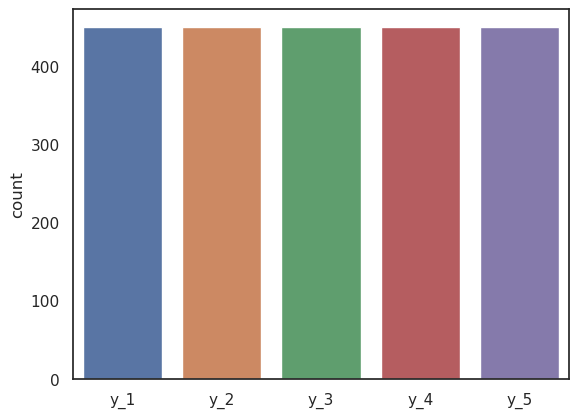

In [10]:
g = sns.countplot(Y_train)

In [11]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel1014,Pixel1015,Pixel1016,Pixel1017,Pixel1018,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023
0,0.490196,0.619608,0.427451,0.388235,0.623529,0.337255,0.415686,0.498039,0.525490,0.392157,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039
1,0.509804,0.305882,0.294118,0.254902,0.419608,0.682353,0.294118,0.325490,0.141176,0.431373,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039
2,0.356863,0.215686,0.262745,0.278431,0.568627,0.654902,0.466667,0.219608,0.470588,0.392157,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039
3,0.141176,0.145098,0.517647,0.325490,0.184314,0.215686,0.192157,0.380392,0.615686,0.262745,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039
4,0.380392,0.388235,0.235294,0.278431,0.450980,0.176471,0.137255,0.490196,0.298039,0.207843,...,0.694118,0.694118,0.682353,0.698039,0.694118,0.694118,0.694118,0.694118,0.690196,0.698039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.152941,0.329412,0.372549,0.407843,0.345098,0.443137,0.227451,0.603922,0.552941,0.290196,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039
446,0.137255,0.552941,0.168627,0.403922,0.501961,0.184314,0.145098,0.631373,0.419608,0.301961,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039
447,0.388235,0.149020,0.286275,0.443137,0.380392,0.388235,0.403922,0.278431,0.423529,0.403922,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039
448,0.309804,0.352941,0.235294,0.258824,0.286275,0.325490,0.384314,0.317647,0.360784,0.388235,...,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.694118,0.698039,0.698039,0.698039


In [13]:
import tensorflow as tf
# Reshape image in 3 dimensions (height = 32px, width = 32px , canal = 1)
X_train_values = tf.reshape(X_train.values, [-1, 32, 32, 1])
X_test_values = tf.reshape(X_test.values, [-1, 32, 32, 1])

In [14]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = np.array(X_train_values)
X_test = np.array(X_test_values)

In [15]:
# Set the random seed
random_seed = 2

In [16]:
# Split the train and the validation set for the fitting
X_train1, X_val, Y_train1, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = random_seed)

In [59]:
from keras.layers import LeakyReLU
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*1 -> MaxPool2D -> [Conv2D->relu]*1 -> MaxPool2D -> Flatten -> Dense -> Out

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(5, activation = "softmax"))

In [60]:
# from keras.optimizers import Adadelta
# Define the optimizer
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Set epochs and batch_size
epochs = 50
batch_size = 16

In [61]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [62]:
# Fit the model
history = model.fit(X_train1, Y_train1, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val),
                    verbose = 2, callbacks = [learning_rate_reduction])

Epoch 1/50
23/23 - 4s - loss: 1.6764 - accuracy: 0.2111 - val_loss: 1.6126 - val_accuracy: 0.1667 - lr: 0.0010 - 4s/epoch - 167ms/step
Epoch 2/50
23/23 - 3s - loss: 1.5885 - accuracy: 0.2611 - val_loss: 1.6265 - val_accuracy: 0.1667 - lr: 0.0010 - 3s/epoch - 115ms/step
Epoch 3/50
23/23 - 3s - loss: 1.4519 - accuracy: 0.3500 - val_loss: 1.3721 - val_accuracy: 0.3667 - lr: 0.0010 - 3s/epoch - 111ms/step
Epoch 4/50
23/23 - 3s - loss: 1.1961 - accuracy: 0.4250 - val_loss: 3.7845 - val_accuracy: 0.1667 - lr: 0.0010 - 3s/epoch - 110ms/step
Epoch 5/50
23/23 - 3s - loss: 1.1884 - accuracy: 0.4722 - val_loss: 1.1623 - val_accuracy: 0.3889 - lr: 0.0010 - 3s/epoch - 112ms/step
Epoch 6/50
23/23 - 3s - loss: 1.0563 - accuracy: 0.4833 - val_loss: 1.4032 - val_accuracy: 0.3889 - lr: 0.0010 - 3s/epoch - 112ms/step
Epoch 7/50
23/23 - 3s - loss: 1.0000 - accuracy: 0.4944 - val_loss: 1.0470 - val_accuracy: 0.5222 - lr: 0.0010 - 3s/epoch - 118ms/step
Epoch 8/50
23/23 - 3s - loss: 0.9120 - accuracy: 0.5556

In [37]:
import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

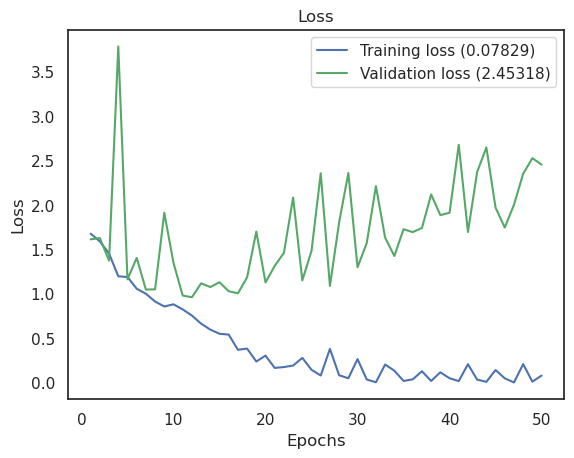

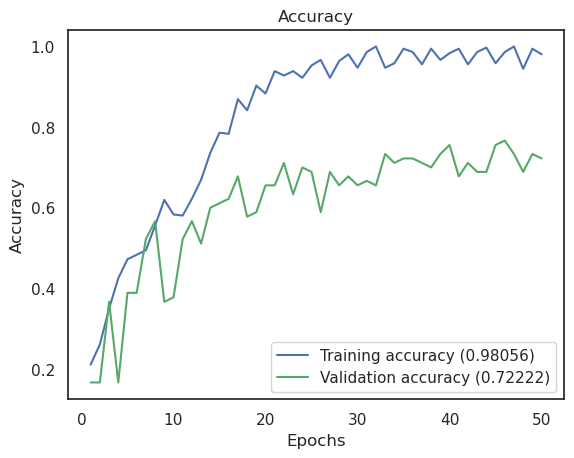

In [63]:
plot_history(history)

In [64]:
from sklearn import metrics

actual = np.argmax(Y_test, axis=1)
predicted = np.argmax(model.predict(X_test), axis=1)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

2/2 [==============================] - 0s 24ms/step


In [65]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'B', 'C', 'D', 'E'])

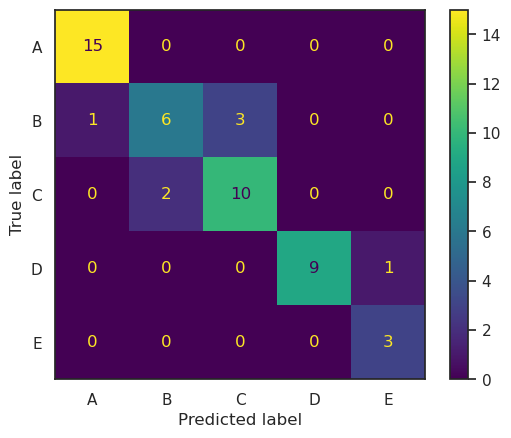

In [66]:
cm_display.plot()
plt.show()

In [67]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("Accuracy = ", accuracy_score(actual, predicted))
print("Recall = ", recall_score(actual, predicted,  average = None))
print("F1_Score = ", f1_score(actual, predicted, average = None))

Accuracy =  0.86
Recall =  [1.         0.6        0.83333333 0.9        1.        ]
F1_Score =  [0.96774194 0.66666667 0.8        0.94736842 0.85714286]
